In [18]:
# importamos todos los paquetes necesarios que usaremos a lo largo del programa 

import csv
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import scipy

In [14]:
from astropy import constants as ast
from astropy import units as u

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs.value           #constante de gravitacion universal en cgs
c = ast.c.cgs.value           #velocidad de la luz en cgs


In [13]:
from scipy import constants as sci
from scipy.constants import physical_constants

#cargamos las constantes que vayamos a usar en el calculo
t_planck = physical_constants["Planck time"][0]
pi = sci.pi

masa_planck = physical_constants["Planck mass"][0]
m_planck = masa_planck*(10**3) #masa de planck en gramos
m_planck

2.176434e-05

In [5]:
#definimos nuestras constantes 
#m_0 = m_sol*10**4              # la masa en el momento en que se produce el bounce
x_b = 9*10**37                 # constante adimensional que me define a a_b con x_b < 10^38 
a_b = 1/x_b                     # constante del bounce
T_b = t_planck*10**25          # 10^3 < T_b / t_planck < 10^40 [s]    asi que elijo uno intermedio
A_M = (5.3*10**25)              # en unidades de g^3 s^-1
#M = m_sol*10**8                 # masa inicial del bh en g
#A = 1                         # sabemos que A>0, pero en principio lo anoto de esta manera para tenerlo
lamb = 1.1056*10**(-56)        # constante cosmologica en cm^-2 
rho_0 = (lamb*c**2)/(8*pi*G)   # densidad de "hoy" en cgs. consideramos la densidad de vacio, que es la que domina

T_b

5.391247e-19

In [ ]:
# calculamos como son las contribuciones en el tiempo con diferentes masas

In [7]:
def guardar_datos_variacion(t, dot_M_b, dot_M_ac, dot_M_rh, archivo):
    datos_var = archivo + '_variacion_masa.csv'
    archivo_existe = False
    try:
        with open(datos_var, 'r') as archivo_csv:
            archivo_existe = True
    except FileNotFoundError: 
        archivo_existe = False
        
    modo_apertura = 'a' if archivo_existe else 'w'
    with open(datos_var, mode=modo_apertura, newline='') as archivo_csv:
        writer = csv.writer(archivo_csv)
        if not archivo_existe:
            writer.writerow(['tiempo', 'dot_M_b', 'dot_M_ac', 'dot_M_rh'])
        writer.writerow([t, dot_M_b, dot_M_ac, dot_M_rh])

In [8]:
masas = (10**(-13)*m_sol, m_sol*10**(-5), m_sol*10**6) #masas en g
#los limites los saque de la tesis de edu, el resto elegi yo

for i in range(len(masas)): 
    for j in range(len(masas)):
        tiempo = np.logspace(-25, 6, 1000, endpoint=False) 
        M = masas[i]
        m_0 = masas[j]
        nombre = str(i)+str(j)
        
        if M >= m_0:
            for t in tiempo:
                if t < -T_b or t > T_b: 
                    w = 1/3  #radiacion 
                    aux = 1+3*w*c.value**2
                    A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)
                    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
                    P = w*(c**2)*rho
        
                    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
                    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P) 
                    if M > 10**17*u.g:
                        A_M = (5.3*10**25)        # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
                    else: 
                        A_M = (7.8*10**26)       # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
                else:
                    w = 1/3   
                    aux = 1+3*w*c.value**2
                    A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)
                    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))  
                    P = w*(c**2)*rho                             
        
                    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
                    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P) 
                    if M > 10**17*u.g:
                        A_M = (5.3*10**25)       # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
                    else: 
                        A_M = (7.8*10**26)       # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
        
            
                datos = guardar_datos_variacion(t, dot_M_b.value, dot_M_ac.value, dot_M_rh.value, nombre)
    

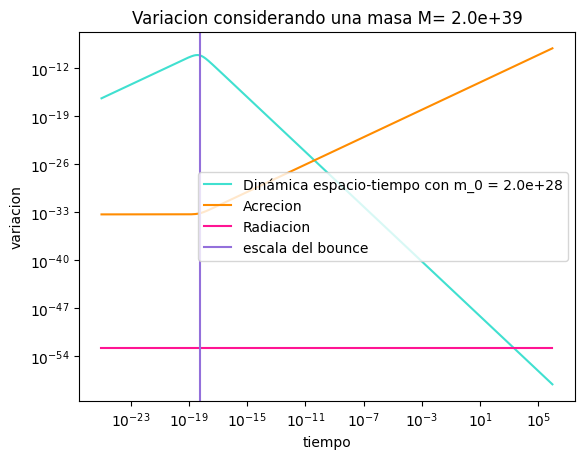

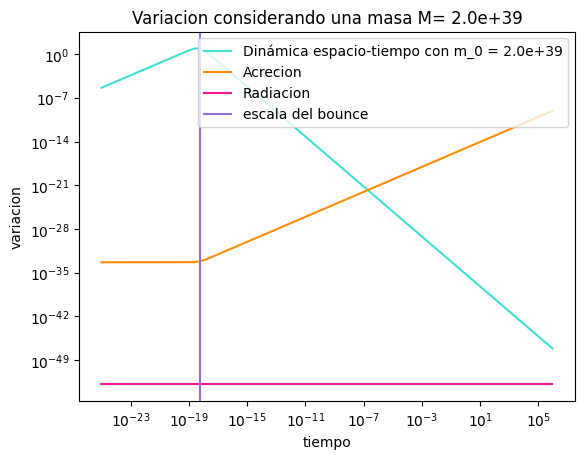

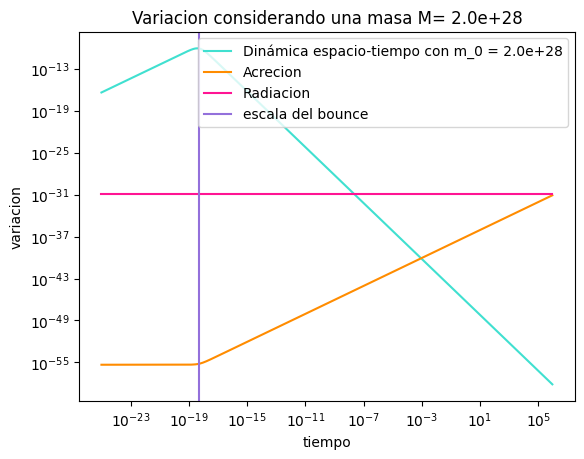

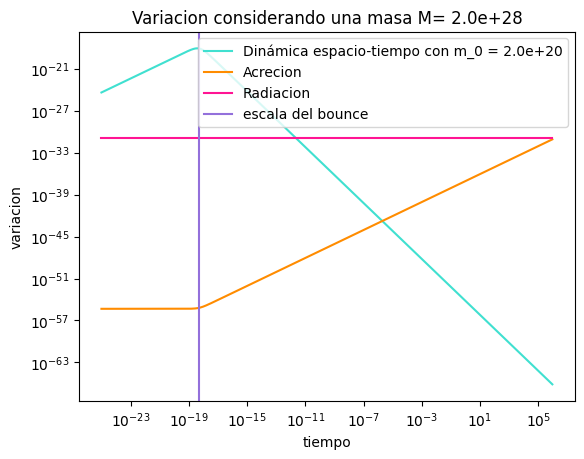

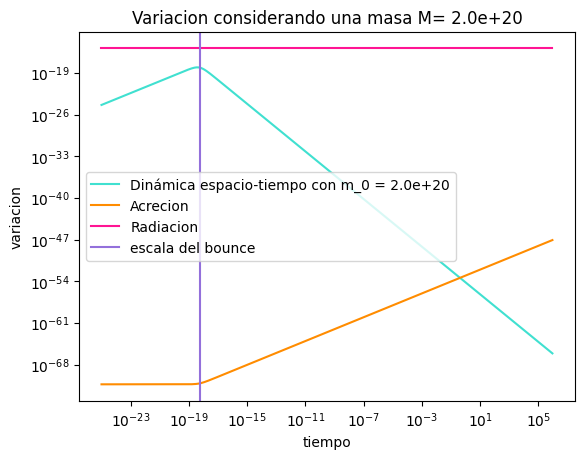

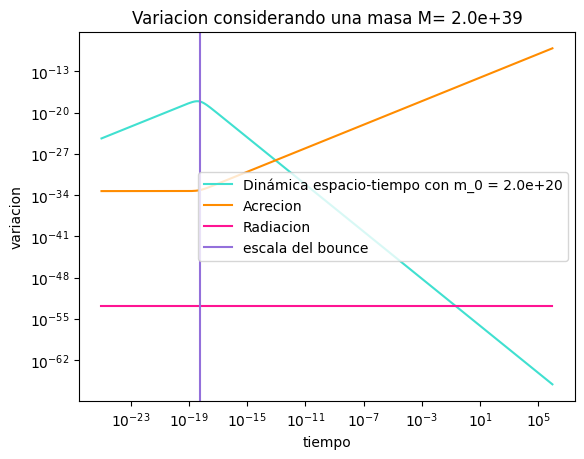

In [9]:
masas = (10**(-13)*m_sol, m_sol*10**(-5), m_sol*10**6)

ruta = "/home/iara/faq/tesis"
archivos = os.listdir(ruta)

datos_csv = [archivo for archivo in archivos if archivo.endswith('.csv')]

for archivo in datos_csv: 
    datos = pd.read_csv(archivo)

    i = int(archivo[0])
    j = int(archivo[1])

    M = masas[i]
    m_0 = masas[j]
    
    t = datos['tiempo']
    dot_M_b = datos['dot_M_b']
    dot_M_ac = datos['dot_M_ac']
    dot_M_rh = -datos['dot_M_rh'] #el menos va porque si no no me deja pasarlo a escala log porque es negativo
    
    plt.xlabel('tiempo')
    plt.ylabel('variacion')
    plt.yscale('log')  
    plt.xscale('log') 
 
    plt.plot(t, dot_M_b, label = "Dinámica espacio-tiempo con m_0 = {:.1e}".format(m_0.value), color = 'turquoise')
    plt.plot(t, dot_M_ac, label = "Acrecion", color='darkorange')
    plt.plot(t, dot_M_rh , label = "Radiacion", color = 'deeppink')
    plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce')
    plt.legend()
    plt.title('Variacion considerando una masa M= {:.1e}'.format(M.value))
    plt.show()

In [ ]:
# resolvemos la eq diferencial de hawking 

0.014146820999999997


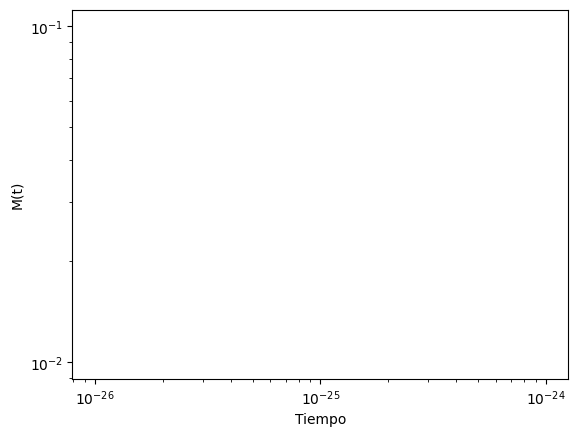

528.0096552852643


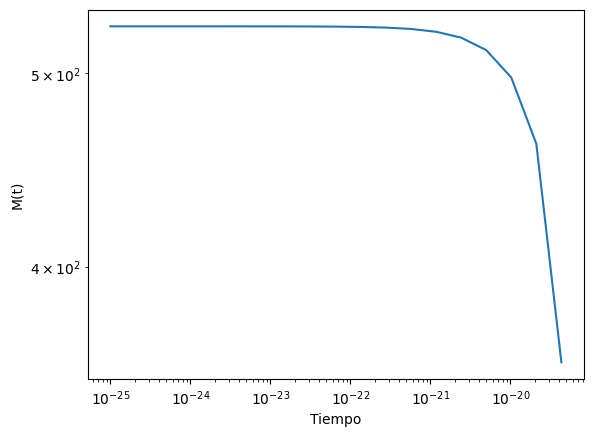

19707197.544555314


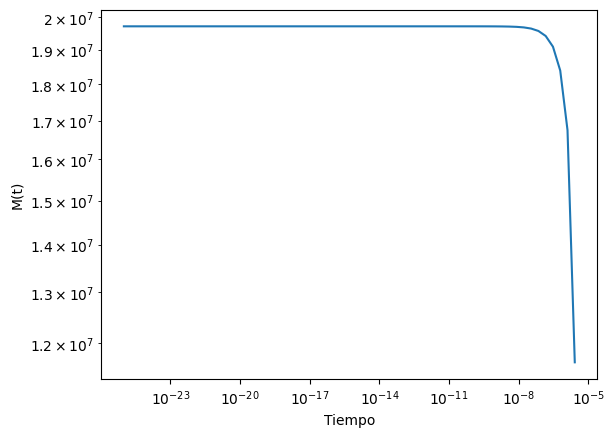

735542676488.1831


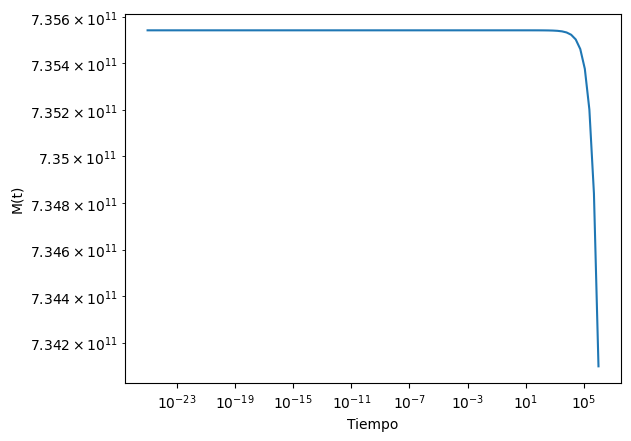

2.7453067728794172e+16


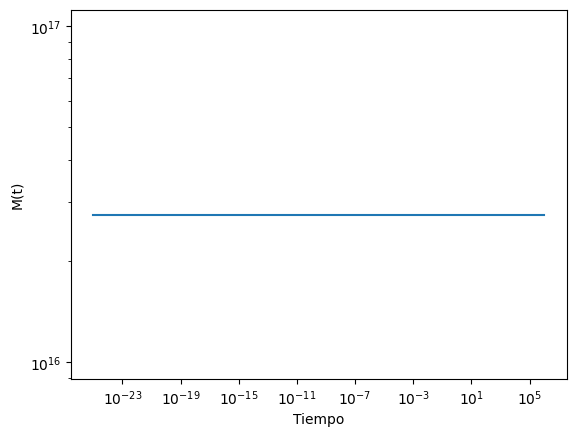

1.0246460903126971e+21


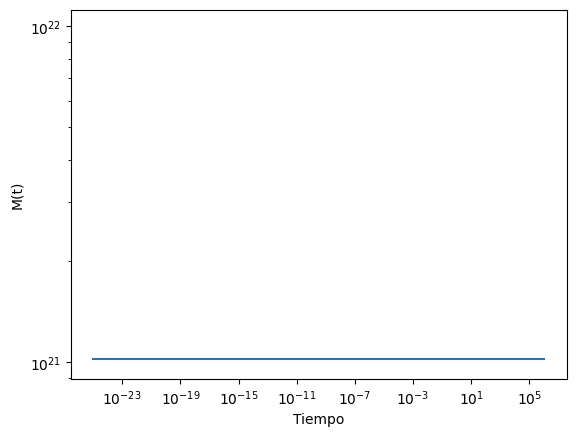

3.824343496926999e+25


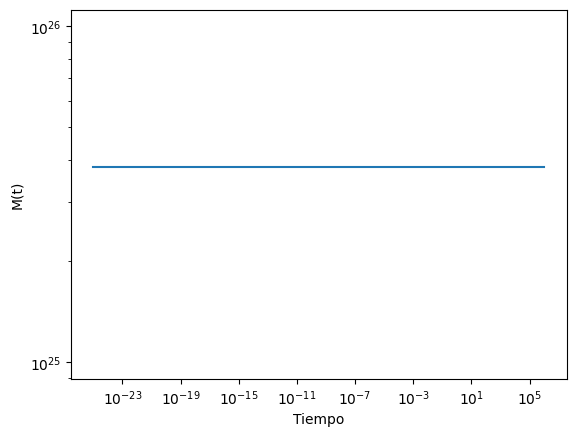

1.4273809582413425e+30


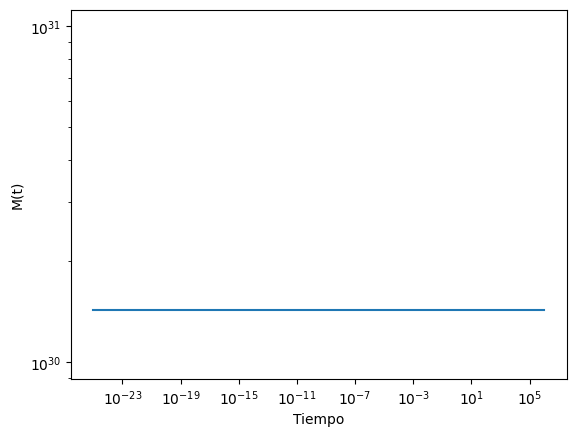

5.327493206578059e+34


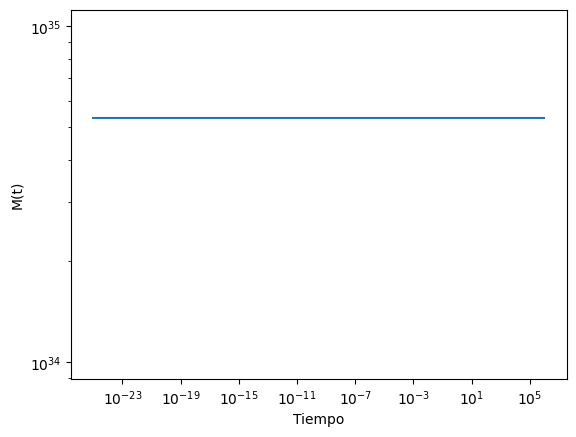

1.9884098706980572e+39


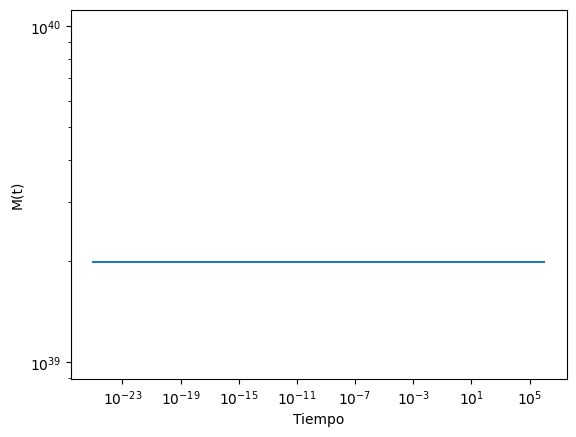

In [49]:
from scipy.integrate import solve_ivp

#definimos el modelo
def model(t, M):
    if M  > 10**17:
        A_M = 5.3e25
        dMdt = -A_M / M**2
    else: 
        A_M = 7.8*10**26  
        dMdt = -A_M / M**2
    return dMdt


masas = np.logspace(np.log10((6.5*10**2)*m_planck), np.log10(m_sol*10**6), 10)


resultado = []

for M_0 in masas:
    
    print(M_0)
    
    tiempo = np.logspace(np.log10(10**-25), np.log10(10**6), 100)
    
    method = 'RK45'
    sol = solve_ivp(model, (tiempo[0], tiempo[-1]), [M_0], method=method, vectorized=True, t_eval=tiempo)
    
    tiempo = sol.t
    Masa = sol.y[0]
        
    plt.figure()
    plt.plot(tiempo, Masa)
    plt.xlabel('Tiempo')
    plt.ylabel('M(t)')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

0.014146820999999997
528.0096552852643
19707197.544555314
735542676488.1831
2.7453067728794172e+16
1.0246460903126971e+21
3.824343496926999e+25
1.4273809582413425e+30
5.327493206578059e+34
1.9884098706980572e+39


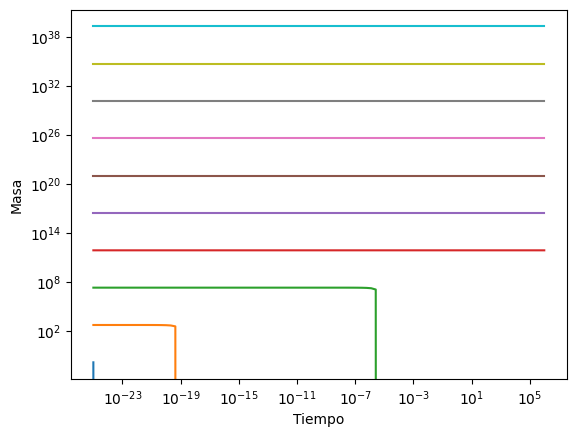

In [48]:
from scipy.integrate import solve_ivp

#definimos el modelo
def model(t, M):
    if M  > 10**17:
        A_M = 5.3e25
        dMdt = -A_M / M**2
    else: 
        A_M = 7.8*10**26  
        dMdt = -A_M / M**2
    return dMdt


paso = 100 #defino cuantos elementos tendre para el tiempo


masas = np.logspace(np.log10((6.5*10**2)*m_planck), np.log10(m_sol*10**6), 10)


resultado = []

for M_0 in masas:
    
    print(M_0)
    
    tiempo = np.logspace(np.log10(10**-25), np.log10(10**6), paso)
    
    method = 'RK45'
    sol = solve_ivp(model, (tiempo[0], tiempo[-1]), [M_0], method=method, vectorized=True, t_eval=tiempo)
    
    tiempo = sol.t
    Masa = sol.y[0]
    
    if Masa.shape == (paso,):
        resultado.append(Masa)
    else:
        no_datos = paso - Masa.shape[0]  # no_datos es la variable que nos dice cuantos elementos de Masa son nulos
        
        Masa_100 = np.pad(Masa, (0, no_datos), mode='constant', constant_values=0) #relleno con 0
        
        resultado.append(Masa_100)
        

tiempo = np.logspace(np.log10(10**-25), np.log10(10**6), 100)

plt.figure()
for M in resultado:
    plt.plot(tiempo, M)
    
plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.xscale('log')
plt.yscale('log')
plt.show()  
          
    


In [46]:
type(Masa.shape[0])

int

In [47]:
Masa.shape = (54,)

no_datos = 100 - Masa.shape[0]  # no_datos es la variable que nos dice cuantos elementos de Masa son nulos
        
for extension in range(no_datos):
    Masa.extend(0)
    
Masa
    

ValueError: cannot reshape array of size 100 into shape (54,)